In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import pickle
from datetime import datetime

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

In [2]:
wine_data = pd.read_csv("../../data/raw/winequality-red.csv", delimiter=',')
print(f" Dataset loaded successfully!")
print(f" Dataset shapee: {wine_data.shape}")


 Dataset loaded successfully!
 Dataset shapee: (1599, 12)


In [3]:
print(wine_data.info())
display(wine_data.head())
display(wine_data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
print("\nMissing values per column:")
print(wine_data.isnull().sum())


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Data Visualization - Original Data 


Data Visualization - Original Data...


/tmp/ipykernel_1272/309254733.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, ax=ax1, palette='viridis')


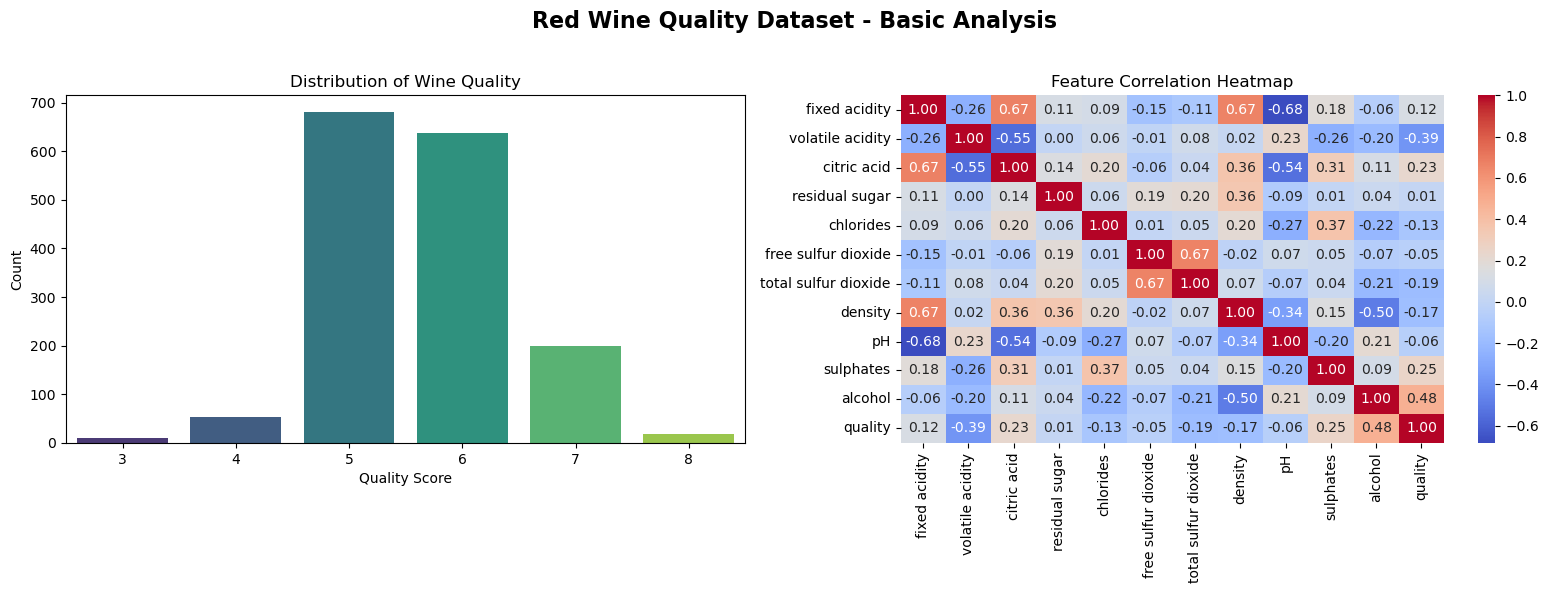

In [5]:

print("\nData Visualization - Original Data...")

# Create separate figures for each visualization to avoid conflicts
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig1.suptitle('Red Wine Quality Dataset - Basic Analysis', fontsize=16, fontweight='bold')

# --- Plot 1: Distribution of Wine Quality ---
sns.countplot(x='quality', data=wine_data, ax=ax1, palette='viridis')
ax1.set_title('Distribution of Wine Quality')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Count')

# --- Plot 2: Correlation Heatmap ---
corr = wine_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax2)
ax2.set_title('Feature Correlation Heatmap')

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])  # keeps title visible
plt.show()


<Figure size 1500x1200 with 0 Axes>

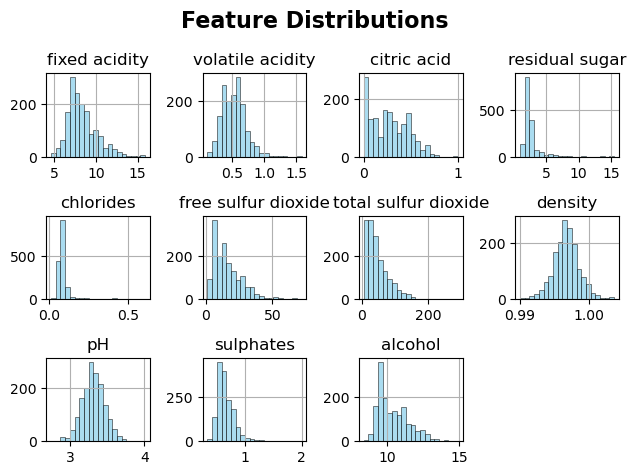

In [6]:

plt.figure(figsize=(15, 12))
wine_data.drop('quality', axis=1).hist(bins=20, layout=(3, 4), 
                                      color='skyblue', alpha=0.7, 
                                      edgecolor='black', linewidth=0.5)
plt.suptitle('Feature Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


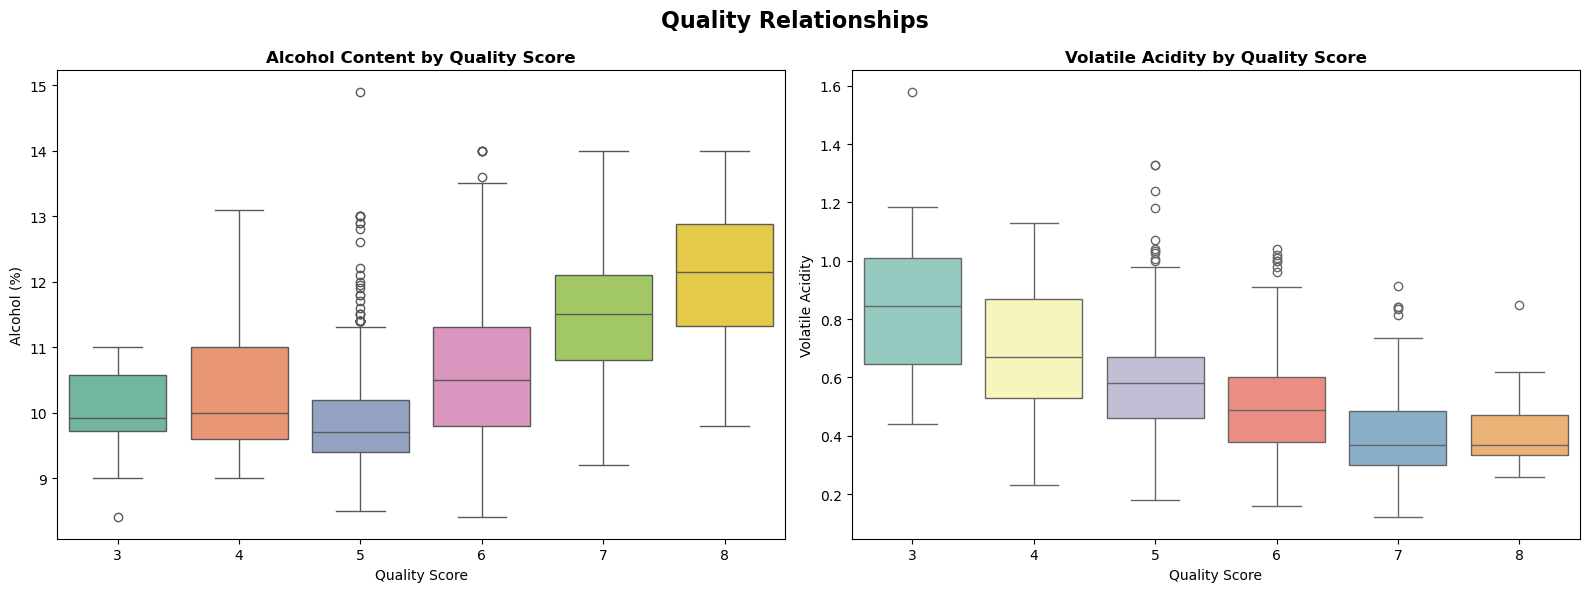

In [7]:

fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig3.suptitle('Quality Relationships', fontsize=16, fontweight='bold')

# Quality vs Alcohol
sns.boxplot(x='quality', y='alcohol', data=wine_data, ax=ax1, hue='quality', palette='Set2', dodge=False)
ax1.set_title('Alcohol Content by Quality Score', fontweight='bold')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Alcohol (%)')
ax1.get_legend().remove()  # remove redundant legend

# Quality vs Volatile Acidity
sns.boxplot(x='quality', y='volatile acidity', data=wine_data, ax=ax2, hue='quality', palette='Set3', dodge=False)
ax2.set_title('Volatile Acidity by Quality Score', fontweight='bold')
ax2.set_xlabel('Quality Score')
ax2.set_ylabel('Volatile Acidity')
ax2.get_legend().remove()  # remove redundant legend

plt.tight_layout()
plt.show()


# Binary Classification Setup

Convert the wine quality score (a numeric value) into a binary classification problem, where:

* Wines with quality greater than or equal to 6 are labeled Good (1)

* Wines with quality 6 or below are labeled Bad (0)

Created binary labels: Good (quality >=6) = 1, Bad = 0

Quality Label Distribution:
quality_label
1    855
0    744
Name: count, dtype: int64


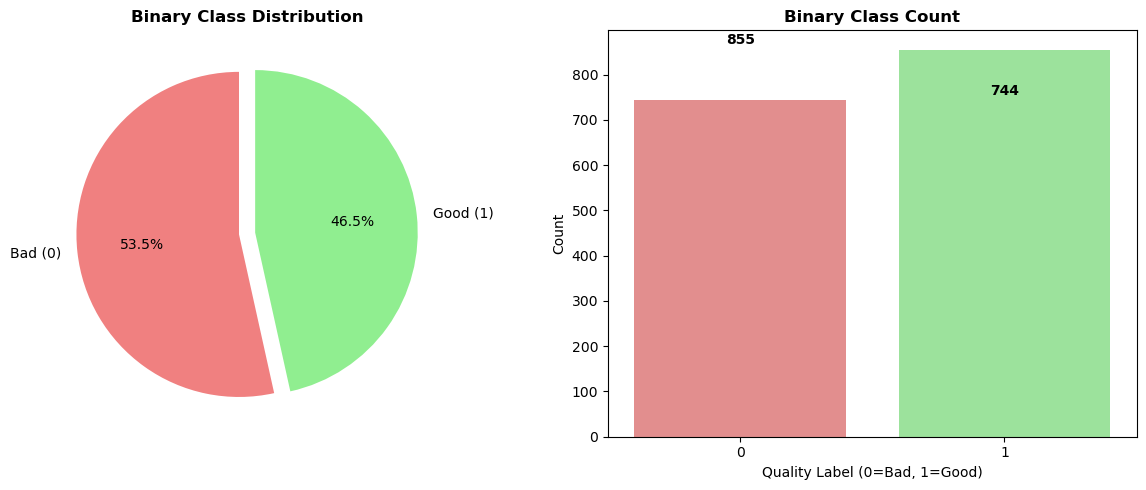

In [8]:

# Convert to binary classification: Good (1) if quality >= 6, else Bad (0)
wine_data['quality_label'] = (wine_data['quality'] >=6).astype(int)
print("Created binary labels: Good (quality >=6) = 1, Bad = 0")
print("\nQuality Label Distribution:")
label_distribution = wine_data['quality_label'].value_counts()
print(label_distribution)
# Visualize binary class distribution
plt.figure(figsize=(12, 5))

# Pie chart
plt.subplot(1, 2, 1)
colors = ['lightcoral', 'lightgreen']
plt.pie(label_distribution.values, labels=['Bad (0)', 'Good (1)'], 
        autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0.05))
plt.title('Binary Class Distribution', fontweight='bold')

# Countplot
ax = plt.subplot(1, 2, 2)
sns.countplot(x='quality_label', data=wine_data, hue='quality_label', palette=colors, dodge=False)
plt.title('Binary Class Count', fontweight='bold')
plt.xlabel('Quality Label (0=Bad, 1=Good)')
plt.ylabel('Count')

# Annotate counts
for i, count in enumerate(label_distribution.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

# Remove redundant legend
ax.get_legend().remove()

plt.tight_layout()
plt.show()


# Data cleaning

### Handling Outliers.

Outliers are extreme values that differ significantly from the rest of the data.
They can distort model training, cause bias, and reduce accuracy.
To handle this, we use outlier capping, which replaces extreme values with upper or lower limits instead of removing data points.

In [9]:
def cap_outliers_iqr(df, column):
    """Cap outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_before = ((df[column] < lower) | (df[column] > upper)).sum()
    df[column] = np.clip(df[column], lower, upper)
    outliers_after = ((df[column] < lower) | (df[column] > upper)).sum()
    return outliers_before, outliers_after
# Copy dataset
wine_cleaned = wine_data.copy()
outlier_summary = []

### Capping outliers using IQR method

In [10]:
# Apply capping
for col in wine_cleaned.columns:
    if col not in ['quality', 'quality_label']:
        before, after = cap_outliers_iqr(wine_cleaned, col)
        outlier_summary.append({'Feature': col, 'Outliers_Before': before, 'Outliers_After': after})

# Create summary DataFrame
outlier_df = pd.DataFrame(outlier_summary)
print("\nOutlier Treatment Summary:")
display(outlier_df)




Outlier Treatment Summary:


,Feature,Outliers_Before,Outliers_After
0,fixed acidity,49,0
1,volatile acidity,19,0
2,citric acid,1,0
3,residual sugar,155,0
4,chlorides,112,0
5,free sulfur dioxide,30,0
6,total sulfur dioxide,55,0
7,density,45,0
8,pH,35,0
9,sulphates,59,0


Visualize outlier treatment

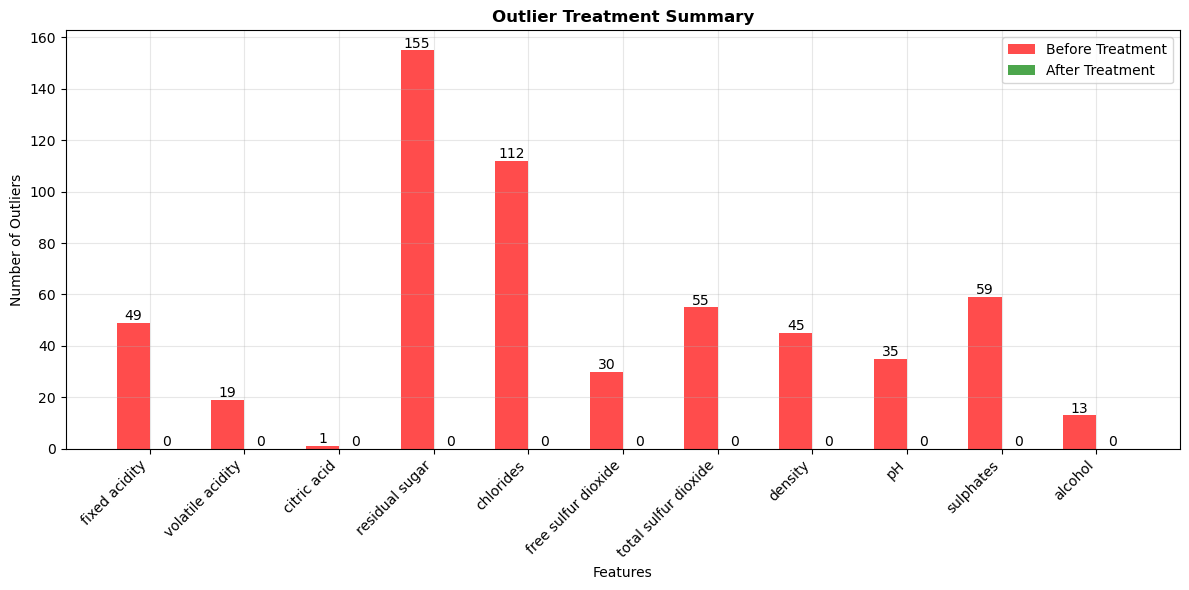

In [11]:
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(outlier_df))
width = 0.35

plt.bar(x_pos - width/2, outlier_df['Outliers_Before'], width, label='Before Treatment', color='red', alpha=0.7)
plt.bar(x_pos + width/2, outlier_df['Outliers_After'], width, label='After Treatment', color='green', alpha=0.7)

# Annotate counts
for i in range(len(outlier_df)):
    plt.text(x_pos[i] - width/2, outlier_df['Outliers_Before'][i] + 1, str(outlier_df['Outliers_Before'][i]), ha='center')
    plt.text(x_pos[i] + width/2, outlier_df['Outliers_After'][i] + 1, str(outlier_df['Outliers_After'][i]), ha='center')

plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Outlier Treatment Summary', fontweight='bold')
plt.xticks(x_pos, outlier_df['Feature'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##  Feature-Target Split

In [12]:
# Features and Target
X = wine_cleaned.drop(['quality', 'quality_label'], axis=1)
y = wine_cleaned['quality_label']

print(f" Features shape: {X.shape}")
print(f" Target shape: {y.shape}")
print(f" Features: {list(X.columns)}")


 Features shape: (1599, 11)
 Target shape: (1599,)
 Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


### Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Training set: {X_train.shape[0]} samples")
print(f" Test set: {X_test.shape[0]} samples")
print(f" Training class distribution:\n{y_train.value_counts()}")
print(f" Test class distribution:\n{y_test.value_counts()}")


 Training set: 1279 samples
 Test set: 320 samples
 Training class distribution:
quality_label
1    684
0    595
Name: count, dtype: int64
 Test class distribution:
quality_label
1    171
0    149
Name: count, dtype: int64


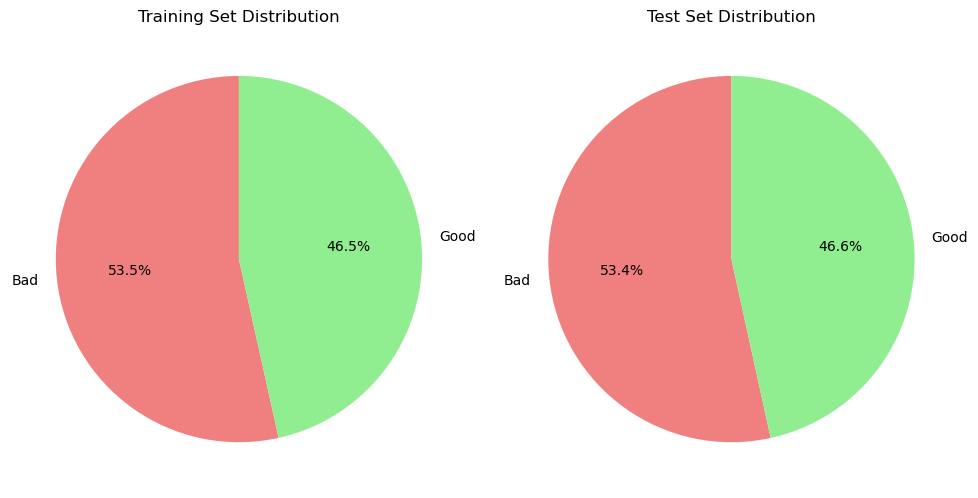

In [14]:
plt.figure(figsize=(10, 5))

train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

plt.subplot(1, 2, 1)
plt.pie(train_counts.values, labels=['Bad', 'Good'], autopct='%1.1f%%', 
        colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Training Set Distribution')

plt.subplot(1, 2, 2)
plt.pie(test_counts.values, labels=['Bad', 'Good'], autopct='%1.1f%%', 
        colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Test Set Distribution')

plt.tight_layout()
plt.show()

### Feature Scaling.

* Ensures no single feature dominates due to scale.
* Makes features directly comparable numerically.

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")



Features scaled using StandardScaler
Scaled training data shape: (1279, 11)
Scaled test data shape: (320, 11)


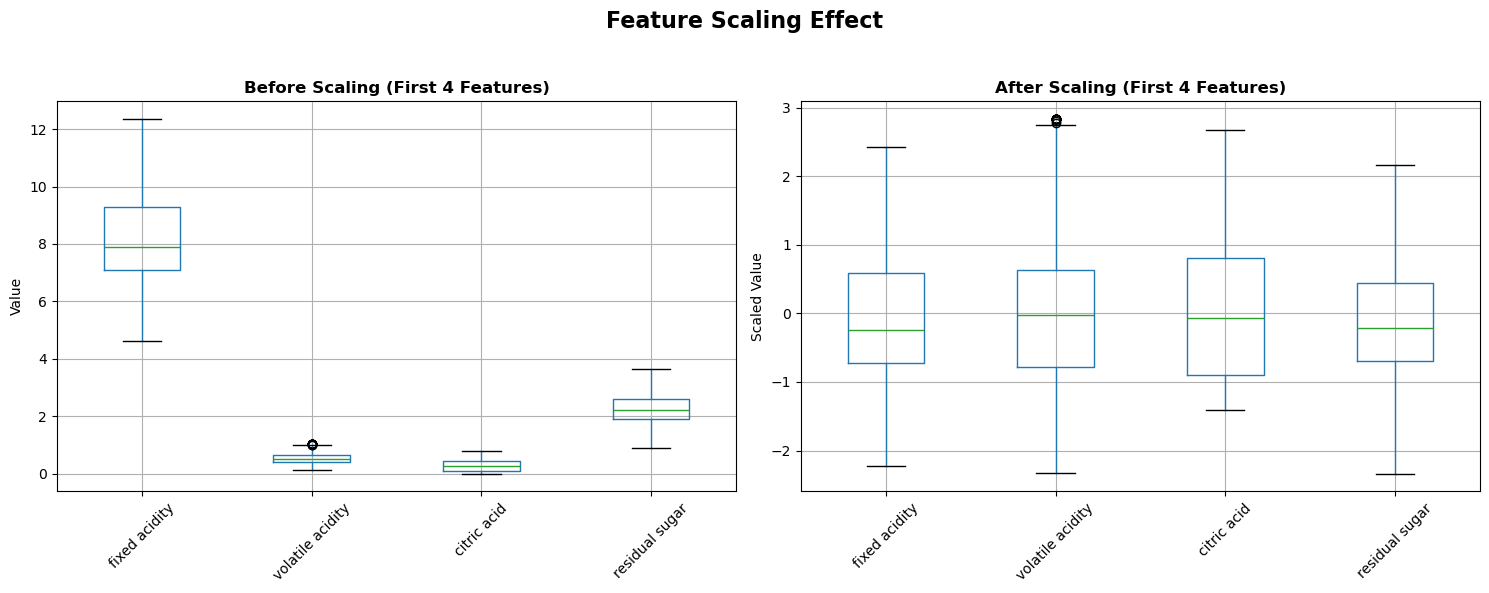

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Feature Scaling Effect', fontweight='bold', fontsize=16)

# Before scaling
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.iloc[:, :4].boxplot(ax=ax1)  # First 4 features
ax1.set_title('Before Scaling (First 4 Features)', fontweight='bold')
ax1.set_ylabel('Value')
ax1.tick_params(axis='x', rotation=45)

# After scaling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled_df.iloc[:, :4].boxplot(ax=ax2)  # First 4 features
ax2.set_title('After Scaling (First 4 Features)', fontweight='bold')
ax2.set_ylabel('Scaled Value')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Prevent overlap with suptitle
plt.show()

# Hyperparameter Tuning with GridSearchCV

The goal of this step is to find the best number of neighbors (k) for the K-Nearest Neighbors (KNN) classifier.
Choosing the right value of k helps the model achieve optimal balance between bias and variance — leading to higher accuracy and better generalization.

In [17]:
param_grid = {'n_neighbors': range(1, 30)}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


print("Performing grid search for optimal k...")
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {best_score:.4f}")


Performing grid search for optimal k...
Best parameters: {'n_neighbors': 1}
Best cross-validation accuracy: 0.7506


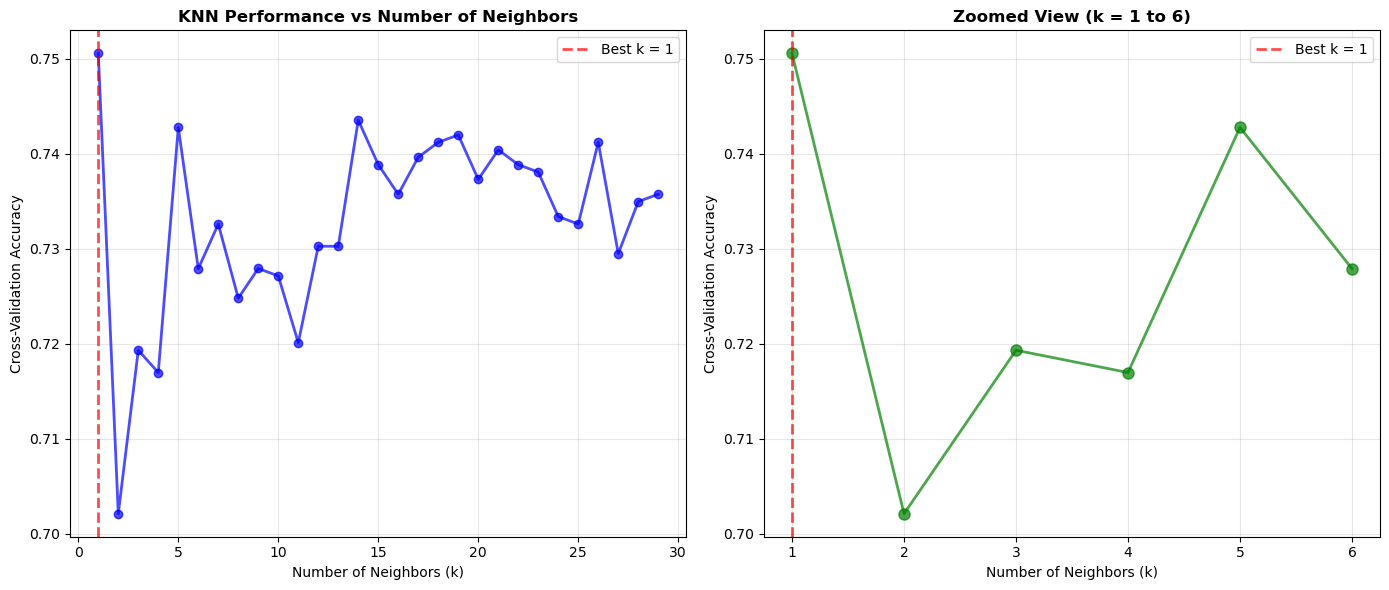

In [18]:
k_range = list(range(1, 30))
mean_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(14, 6))

# Full range plot
plt.subplot(1, 2, 1)
plt.plot(k_range, mean_scores, marker='o', linestyle='-', color='b', alpha=0.7, linewidth=2)
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.7, linewidth=2, label=f'Best k = {best_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Performance vs Number of Neighbors', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Zoomed plot around best k
plt.subplot(1, 2, 2)
best_idx = k_range.index(best_k)
start_idx = max(0, best_idx - 5)
end_idx = min(len(k_range), best_idx + 6)
plt.plot(k_range[start_idx:end_idx], mean_scores[start_idx:end_idx],
         marker='o', linestyle='-', color='green', alpha=0.7, linewidth=2, markersize=8)
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.7, linewidth=2, label=f'Best k = {best_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title(f'Zoomed View (k = {k_range[start_idx]} to {k_range[end_idx-1]})', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Training and Evaluating Best Model

In [19]:
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Predicted labels
y_pred = best_knn.predict(X_test_scaled)

# Predicted probabilities
y_pred_proba = best_knn.predict_proba(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model Trained: KNeighborsClassifier(n_neighbors={best_k})")
print(f"Test Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad', 'Good']))



Best Model Trained: KNeighborsClassifier(n_neighbors=1)
Test Accuracy: 0.7469

Classification Report:
              precision    recall  f1-score   support

         Bad       0.74      0.70      0.72       149
        Good       0.75      0.78      0.77       171

    accuracy                           0.75       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.75      0.75       320



Confusion Matrix Visualization

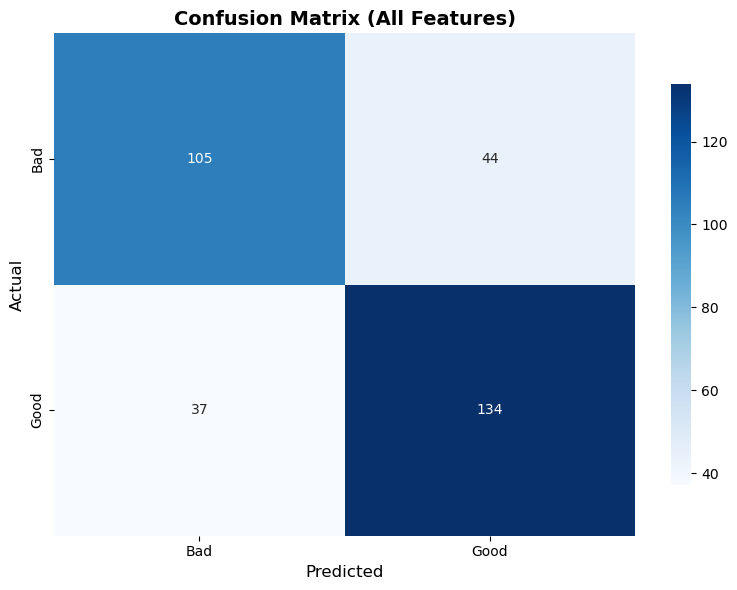

In [20]:
plt.figure(figsize=(8, 6))  # Set a reasonable figure size

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=['Bad', 'Good'], 
    yticklabels=['Bad', 'Good'],
    cbar_kws={'shrink': 0.8}
)
plt.title('Confusion Matrix (All Features)', fontweight='bold', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Probability distribution

Visualizes how confident the model is about its predictions.
Helps you see separation between classes:

* If “Good” and “Bad” probabilities overlap a lot → model struggles to distinguish.

* If they’re well-separated → model is confident.

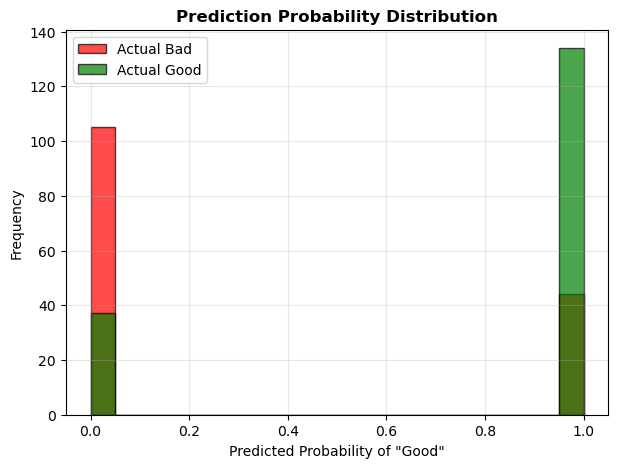

In [21]:
plt.figure(figsize=(7, 5))
bad_probs = y_pred_proba[y_test == 0, 1]   # Probability of "Good" for actual Bad
good_probs = y_pred_proba[y_test == 1, 1]  # Probability of "Good" for actual Good

plt.hist(bad_probs, bins=20, alpha=0.7, label='Actual Bad', color='red', edgecolor='black')
plt.hist(good_probs, bins=20, alpha=0.7, label='Actual Good', color='green', edgecolor='black')
plt.xlabel('Predicted Probability of "Good"')
plt.ylabel('Frequency')
plt.title('Prediction Probability Distribution', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Feature importance using permutation

permutation_importance() measures how much each feature contributes to the model’s performance.

It works by:

1. Randomly shuffling the values of one feature at a time.

2. Measuring how much the model’s accuracy drops after shuffling.

3. If accuracy drops a lot → that feature is important.

4. If accuracy stays almost the same → that feature is less important.

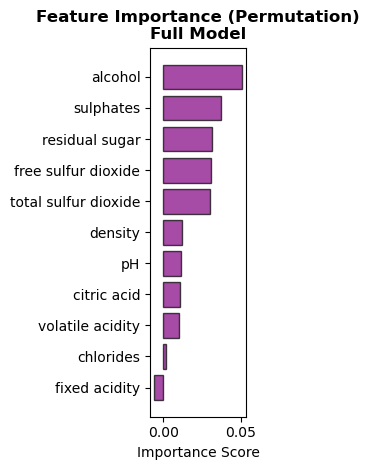

In [22]:
plt.subplot(1, 3, 3)
result_full = permutation_importance(best_knn, X_test_scaled, y_test, 
                                   n_repeats=10, random_state=42, n_jobs=-1)
feature_imp_full = pd.DataFrame({
    'feature': X.columns,
    'importance': result_full.importances_mean
}).sort_values('importance', ascending=True)

plt.barh(feature_imp_full['feature'], feature_imp_full['importance'], 
         color='purple', alpha=0.7, edgecolor='black')
plt.title('Feature Importance (Permutation)\nFull Model', fontweight='bold')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()


# Feature Selection Analysis

Feature Importance Scores:


,Feature,ANOVA_F_Score,Mutual_Info_Score
10,alcohol,378.938321,0.134418
1,volatile acidity,185.180911,0.086963
9,sulphates,140.922061,0.072923
6,total sulfur dioxide,101.681464,0.033776
4,chlorides,43.088929,0.000000
7,density,41.901068,0.040036
2,citric acid,41.729250,0.036989
0,fixed acidity,15.400687,0.043266
5,free sulfur dioxide,5.884496,0.000000
8,pH,0.084118,0.000000


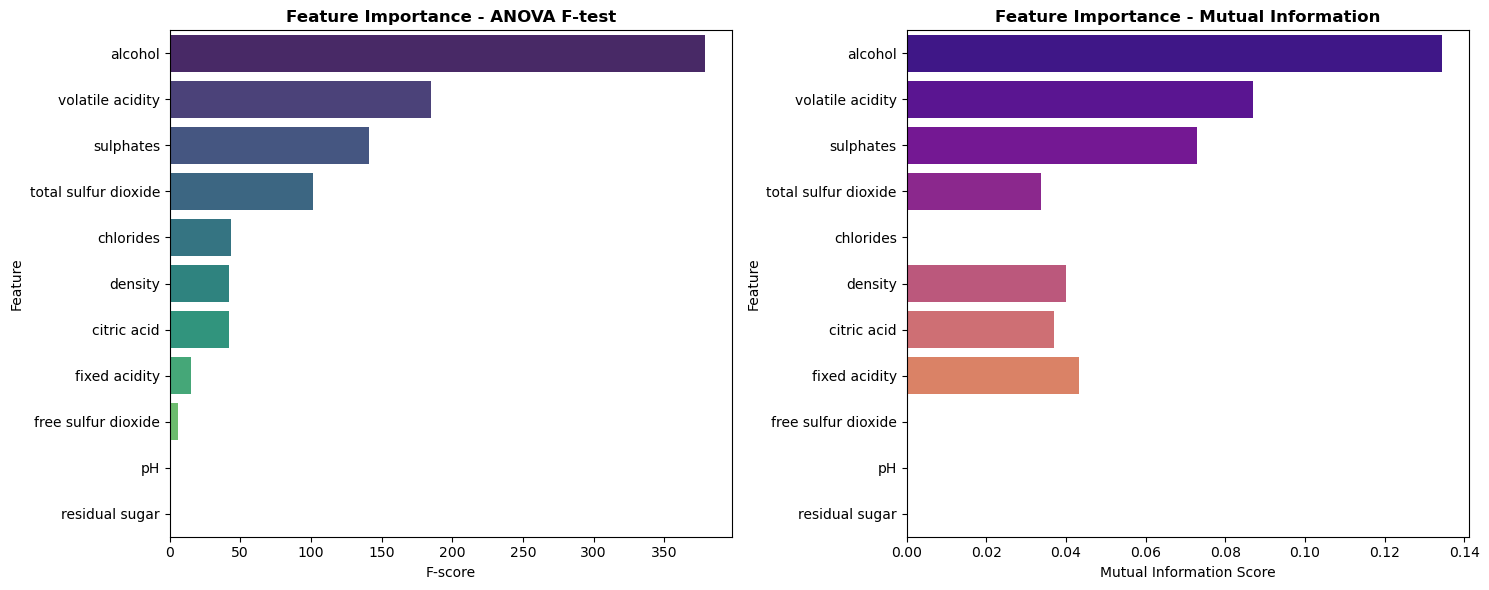

In [23]:

# Scale all features
X_scaled = scaler.fit_transform(X)

# --- ANOVA F-test ---
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X_scaled, y)
f_scores = selector_f.scores_

# --- Mutual Information ---
mi_scores = mutual_info_classif(X_scaled, y, random_state=42)

# --- Create feature scores dataframe ---
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_F_Score': f_scores,
    'Mutual_Info_Score': mi_scores
}).sort_values(by='ANOVA_F_Score', ascending=False)
print("Feature Importance Scores:")
display(feature_scores)

# --- Visualization ---
# --- Visualization ---
plt.figure(figsize=(15, 6))

# ANOVA F-test plot
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    x='ANOVA_F_Score', 
    y='Feature', 
    data=feature_scores,
    hue='Feature', 
    dodge=False, 
    palette=sns.color_palette("viridis", len(feature_scores))
)
plt.title('Feature Importance - ANOVA F-test', fontweight='bold')
plt.xlabel('F-score')
if ax1.get_legend() is not None:
    ax1.get_legend().remove()  # Remove redundant legend

# Mutual Information plot
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    x='Mutual_Info_Score', 
    y='Feature', 
    data=feature_scores,
    hue='Feature', 
    dodge=False, 
    palette=sns.color_palette("plasma", len(feature_scores))
)
plt.title('Feature Importance - Mutual Information', fontweight='bold')
plt.xlabel('Mutual Information Score')
if ax2.get_legend() is not None:
    ax2.get_legend().remove()  # Remove redundant legend

plt.tight_layout()
plt.show()


# Training Reduced Feature Model

In [24]:
# Select top 5 features
top_features = feature_scores.head(5)['Feature'].tolist()
print(f"Top 5 features selected: {top_features}")

X_reduced = wine_cleaned[top_features]
y_reduced = wine_cleaned['quality_label']

# Split reduced data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=42, stratify=y_reduced
)

# Scale reduced features
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

# Train reduced model
knn_reduced = KNeighborsClassifier(n_neighbors=best_k)
knn_reduced.fit(X_train_r_scaled, y_train_r)
y_pred_r = knn_reduced.predict(X_test_r_scaled)
accuracy_reduced = accuracy_score(y_test_r, y_pred_r)

print(f"Reduced Model Trained with {len(top_features)} features")
print(f"Reduced Model Accuracy: {accuracy_reduced:.4f}")


Top 5 features selected: ['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'chlorides']
Reduced Model Trained with 5 features
Reduced Model Accuracy: 0.7812


# Permutation Importance Analysis

* Features at the top of the chart have the greatest influence on predicting wine quality (Good/Bad).

* Features with low or near-zero importance contribute very little — they could be safely ignored in future models.

* The standard deviation bars show the stability of importance estimates (smaller = more reliable).

Permutation Importance of Top Features:


,Feature,Importance,Std_Deviation
0,alcohol,0.140313,0.015528
2,sulphates,0.121250,0.018265
3,total sulfur dioxide,0.110625,0.011285
1,volatile acidity,0.109063,0.015402
4,chlorides,0.062813,0.011220


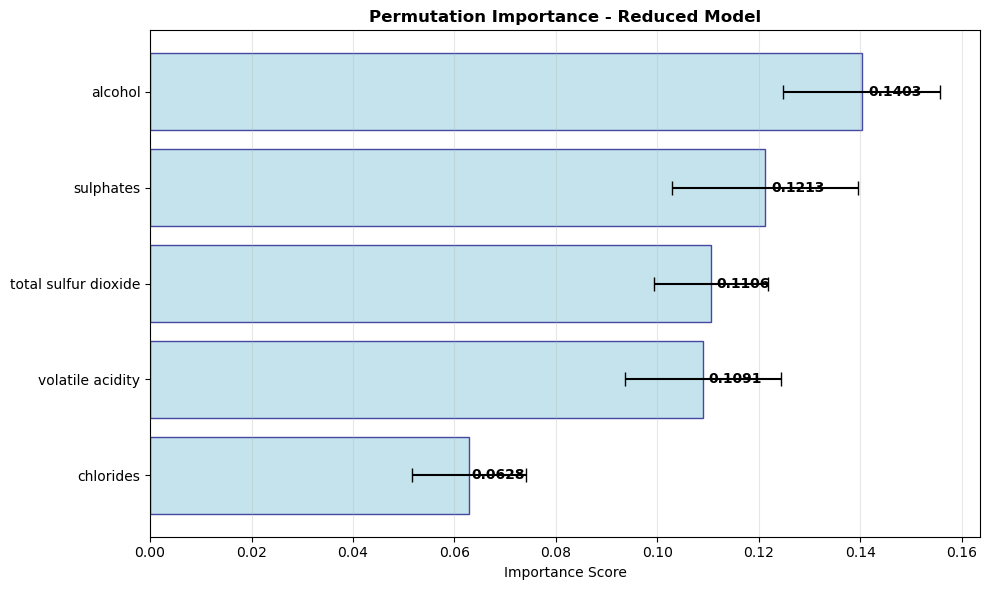

In [25]:
result = permutation_importance(
    knn_reduced, X_test_r_scaled, y_test_r, 
    n_repeats=10, random_state=42, n_jobs=-1
)

print("Permutation Importance of Top Features:")
permutation_importance_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': result.importances_mean,
    'Std_Deviation': result.importances_std
}).sort_values('Importance', ascending=False)

display(permutation_importance_df)
# Reverse DataFrame for top-down importance
perm_df_sorted = permutation_importance_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(perm_df_sorted['Feature'], 
                perm_df_sorted['Importance'],
                xerr=perm_df_sorted['Std_Deviation'],
                color='lightblue', alpha=0.7, edgecolor='navy', capsize=5)

plt.xlabel('Importance Score')
plt.title('Permutation Importance - Reduced Model', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for bar, importance in zip(bars, perm_df_sorted['Importance']):
    plt.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height()/2, 
             f'{importance:.4f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


Precision-Recall Analysis and Threshold Tuning...
Average Precision Score: 0.7055


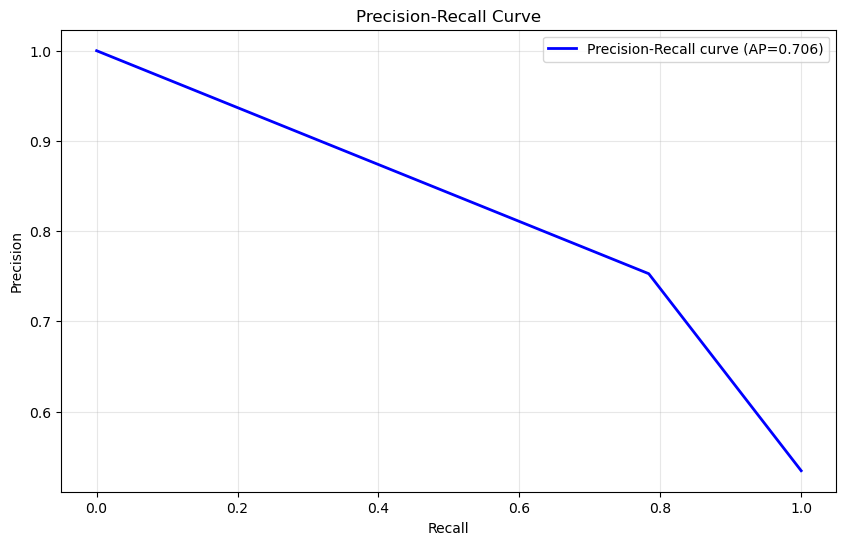

Optimal Threshold (F1-maximizing): 1.0000
F1-score at optimal threshold: 0.7679

Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

         Bad       0.74      0.70      0.72       149
        Good       0.75      0.78      0.77       171

    accuracy                           0.75       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.75      0.75       320



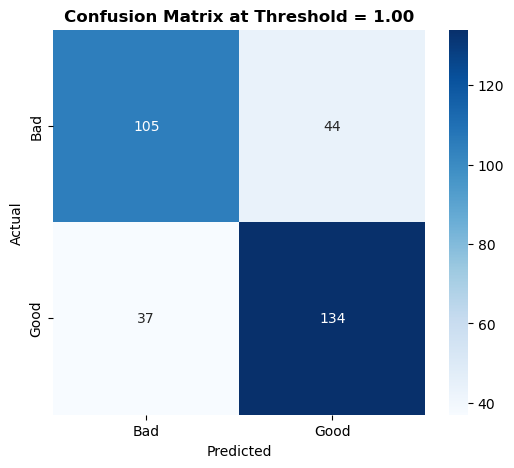

In [26]:

from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score

print("\nPrecision-Recall Analysis and Threshold Tuning...")

# Use the predicted probabilities of the positive class ("Good" = 1)
y_scores = best_knn.predict_proba(X_test_scaled)[:, 1]

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute average precision
avg_precision = average_precision_score(y_test, y_scores)
print(f"Average Precision Score: {avg_precision:.4f}")

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AP={avg_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Optional: Find optimal threshold (maximize F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # avoid divide by zero
best_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[best_idx]

print(f"Optimal Threshold (F1-maximizing): {optimal_threshold:.4f}")
print(f"F1-score at optimal threshold: {f1_scores[best_idx]:.4f}")

# Predict with custom threshold
y_pred_custom = (y_scores >= optimal_threshold).astype(int)

# Evaluate metrics at custom threshold
from sklearn.metrics import confusion_matrix, classification_report

print("\nClassification Report at Optimal Threshold:")
print(classification_report(y_test, y_pred_custom, target_names=['Bad', 'Good']))

# Confusion matrix visualization
cm_custom = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title(f'Confusion Matrix at Threshold = {optimal_threshold:.2f}', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Saving Model Package

In [27]:
save_dir = "../../models/FC211044_KNN_Wine_Quality"
os.makedirs(save_dir, exist_ok=True)

# Create comprehensive model package
model_package = {
    'model': knn_reduced,
    'scaler': scaler,
    'feature_names': top_features,
    'model_name': 'KNeighborsClassifier (Binary Wine Quality)',
    'best_k': best_k,
    'accuracy': accuracy_reduced,
    'classes': knn_reduced.classes_,
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'parameters': knn_reduced.get_params(),
    'feature_importance': permutation_importance_df.to_dict(),
    'dataset_info': {
        'original_shape': wine_data.shape,
        'training_samples': X_train_r.shape[0],
        'test_samples': X_test_r.shape[0],
        'class_distribution': dict(y_reduced.value_counts())
    }
}

# Save in multiple formats
model_filename = os.path.join(save_dir, f"wine_quality_binary_knn_k{best_k}.joblib")
joblib.dump(model_package, model_filename)

pkl_filename = os.path.join(save_dir, f"wine_quality_binary_knn_k{best_k}.pkl")
with open(pkl_filename, 'wb') as f:
    pickle.dump(model_package, f)

print(f" Model package saved successfully!")
print(f" Joblib file: {model_filename}")
print(f" Pickle file: {pkl_filename}")


 Model package saved successfully!
 Joblib file: ../../models/FC211044_KNN_Wine_Quality/wine_quality_binary_knn_k1.joblib
 Pickle file: ../../models/FC211044_KNN_Wine_Quality/wine_quality_binary_knn_k1.pkl


### Model Deployment Test

In [28]:

# Load the saved model
loaded_package = joblib.load(model_filename)
loaded_model = loaded_package['model']
loaded_scaler = loaded_package['scaler']
loaded_features = loaded_package['feature_names']

print("Model loaded successfully for testing")

# Test with sample data from the dataset
sample_indices = [0, 10, 20]  # Sample different rows
sample_data = []

for idx in sample_indices:
    sample_row = wine_data.iloc[idx][loaded_features].values.tolist()
    sample_data.append(sample_row)

print("\n Sample Predictions:")
print("=" * 50)

for i, sample in enumerate(sample_data, 1):
    # Create DataFrame with correct feature names
    sample_df = pd.DataFrame([sample], columns=loaded_features)
    
    # Scale and predict
    sample_scaled = loaded_scaler.transform(sample_df)
    prediction = loaded_model.predict(sample_scaled)
    probability = loaded_model.predict_proba(sample_scaled)
    
    quality_label = "Good Wine" if prediction[0] == 1 else "Bad Wine"
    confidence = probability[0][prediction[0]] * 100
    
    print(f"Sample {i}:")
    print(f"  - Prediction: {quality_label}")
    print(f"  - Confidence: {confidence:.2f}%")
    print(f"  - Probability [Bad, Good]: [{probability[0][0]:.3f}, {probability[0][1]:.3f}]")
    print("-" * 40)



Model loaded successfully for testing

 Sample Predictions:
Sample 1:
  - Prediction: Bad Wine
  - Confidence: 100.00%
  - Probability [Bad, Good]: [1.000, 0.000]
----------------------------------------
Sample 2:
  - Prediction: Bad Wine
  - Confidence: 100.00%
  - Probability [Bad, Good]: [1.000, 0.000]
----------------------------------------
Sample 3:
  - Prediction: Good Wine
  - Confidence: 100.00%
  - Probability [Bad, Good]: [0.000, 1.000]
----------------------------------------
